In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import io
import tensorflow as tf
from matplotlib import pyplot as plt

%matplotlib inline

import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
tf.__version__

'2.1.0'

In [6]:
embedding_layer = layers.Embedding(1000,5)

results = embedding_layer(tf.constant([1,2,3]))

print(results.numpy())


[[-0.03886433  0.00863772 -0.01774441  0.00964713  0.03197291]
 [ 0.0280833  -0.02215128 -0.0088492   0.00203644  0.04238671]
 [ 0.01732786  0.01081746  0.03807357  0.03046104 -0.00380265]]


In [9]:
print(results.numpy().shape)

(3, 5)


In [10]:
(train_data,test_data),info = tfds.load('imdb_reviews/subwords8k',split=(tfds.Split.TRAIN,tfds.Split.TEST),with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGRJ2RS/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGRJ2RS/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGRJ2RS/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [11]:
encoder = info.features['text'].encoder
print(encoder.subwords[:20])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


In [0]:
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10,padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10,padded_shapes=padded_shapes)

In [13]:
embedding_dim = 16
model = keras.Sequential([
                          layers.Embedding(encoder.vocab_size,embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(train_batches,epochs=15,validation_data=test_batches,validation_steps=20)


Epoch 1/15
2500/2500 [==============================] - 31s 12ms/step - loss: 0.6393 - accuracy: 0.6891 - val_loss: 0.5490 - val_accuracy: 0.8250
Epoch 2/15
2500/2500 [==============================] - 21s 9ms/step - loss: 0.4693 - accuracy: 0.8356 - val_loss: 0.4515 - val_accuracy: 0.8350
Epoch 3/15
2500/2500 [==============================] - 21s 9ms/step - loss: 0.3642 - accuracy: 0.8785 - val_loss: 0.4347 - val_accuracy: 0.8000
Epoch 4/15
2500/2500 [==============================] - 22s 9ms/step - loss: 0.3091 - accuracy: 0.8955 - val_loss: 0.3965 - val_accuracy: 0.8600
Epoch 5/15
2500/2500 [==============================] - 23s 9ms/step - loss: 0.2757 - accuracy: 0.9072 - val_loss: 0.3258 - val_accuracy: 0.8950
Epoch 6/15
2500/2500 [==============================] - 22s 9ms/step - loss: 0.2515 - accuracy: 0.9161 - val_loss: 0.2953 - val_accuracy: 0.8800
Epoch 7/15
2500/2500 [==============================] - 23s 9ms/step - loss: 0.2317 - accuracy: 0.9226 - val_loss: 0.3916 - val_a

KeyError: ignored

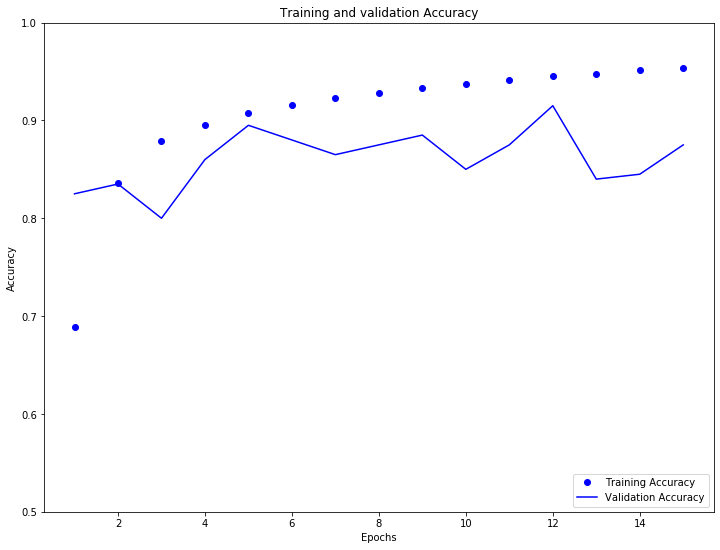

In [16]:

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1,len(acc)+1)

plt.figure(figsize=(12,9))
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()